# GW170817, GRB 170817A, & IceCube Neutrino Localization

Authors: Amanda Beck, Zsuzsa Marka

## Index:

1. [Gravitational Wave Data for BNS Merger](#Gravitational-Wave-Data-for-BNS-Merger:)
    1. [Finding Highest Probability Pixel](#Finding-Highest-Probability-Pixel:)
    2. [Plotting BNS Skymap](#Plotting-BNS-Skymap:)
2. [Fermi GRB 170817A Data](#Fermi-GRB-170817A-Data:)
    1. [Plotting GRB 170817A & GW170817](#Plotting-GRB-170817A-&-GW170817:)
3. [Is there a coincident neutrino in IceCube data?](#Is-there-a-coincident-neutrino-in-IceCube-data?)
4. [Final Localization Skymap](#Final-Localization-Skymap:)
5. [Resources](#Resources:)

In [1]:
# imports:
from astropy.table import Column, Table, join
from astropy.coordinates import SkyCoord
from matplotlib import pyplot as plt
import astropy.coordinates as coord
from astropy.io import fits, ascii
import astropy.units as u
import ligo.skymap.moc
import healpy as hp
import numpy as np

# imports from src code:
import sys
sys.path.append('../src')
from functions import plot_mollview

# defining plot inclusion in notebook:
%matplotlib inline

## Gravitational Wave Data for BNS Merger:

Data can be found in the GW170817 data Release. The link can be found in [Resources](#Resources:).

In [2]:
# opening BNS LIGO data:
GW170817 = '../data/GW170817_skymap.fits' 
bns_data = Table.read(GW170817, 
                      format='fits')

# adding an index row to prevent pixel scrambling:
index = Column(np.arange(len(bns_data)), 
               name='INDEX')
bns_data.add_column(index, 
                    index=0)

bns_data[:5]

INDEX,PROB,DISTMU,DISTSIGMA,DISTNORM
,1 / pix,Mpc,Mpc,1 / Mpc2
int64,float64,float64,float64,float64
0,0.0,0.588122259234962,0.12664444738884278,2.7629911260157716
1,0.0,0.588122259234962,0.12664444738884278,2.7629911260157716
2,0.0,0.588122259234962,0.12664444738884278,2.7629911260157716
3,0.0,0.588122259234962,0.12664444738884278,2.7629911260157716
4,0.0,0.588122259234962,0.12664444738884278,2.7629911260157716


Another data set that can be found for GW events are Multi-Order Skymaps. A detailed explanation can be found in LSC's Multi-Order Sky Maps page. The link can be found in [Resources](#Resources:).

To deal with these types of data, we need to convert them to Single-Order, which can be done using `ligo.skymap.moc.rasterize`. The link to LIGO's `moc` documentation can also be found in [Resources](#Resources:).

In [3]:
# printing fits header for more information:
fits.getheader('../data/GW170817_skymap.fits', 1)

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   32 / length of dimension 1                          
NAXIS2  =             12582912 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    4 / number of table fields                         
TTYPE1  = 'PROB    '                                                            
TFORM1  = 'D       '                                                            
TUNIT1  = 'pix-1   '                                                            
TTYPE2  = 'DISTMU  '                                                            
TFORM2  = 'D       '        

### Finding Highest Probability Pixel:

In [4]:
# find highest probability pixel (my own way):
bns_highest_prob = bns_data[bns_data['PROB'] == np.amax(bns_data['PROB'])]
# find the RA and DEC:
radec = hp.pix2ang(hp.get_nside(bns_data['PROB']), bns_highest_prob['INDEX'], nest=True, lonlat=True)

print('RA: '+ str(radec[0][0]))
print('DEC: '+ str(radec[1][0]))

RA: 196.30371093749997
DEC: -21.30184610840405


### Plotting BNS Skymap:

0.0 180.0 -180.0 180.0
The interval between parallels is 15 deg -0.00'.
The interval between meridians is 15 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 15 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


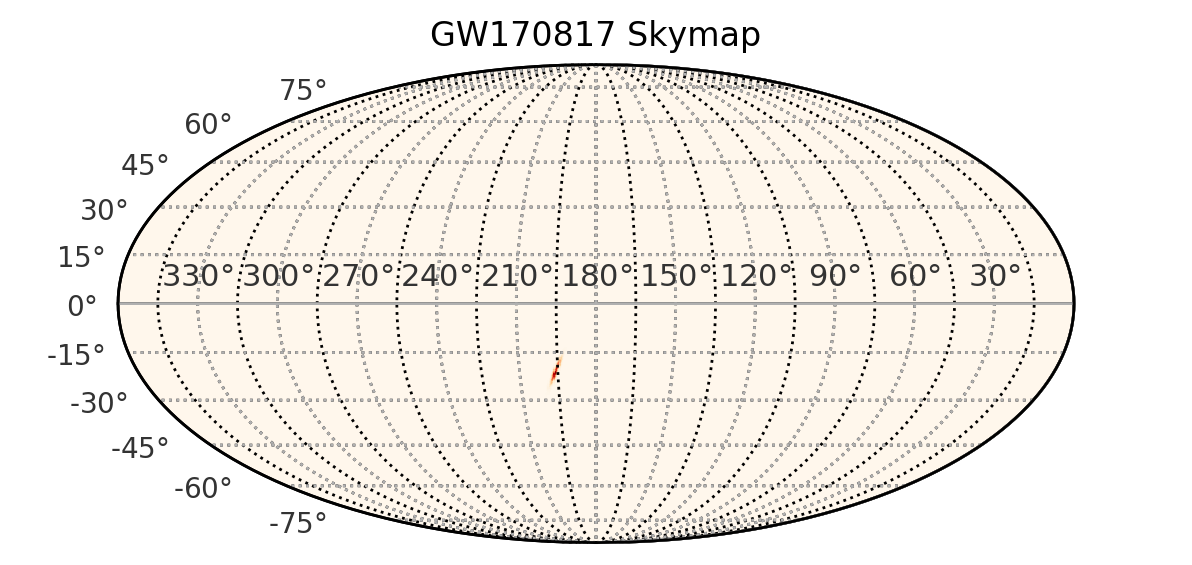

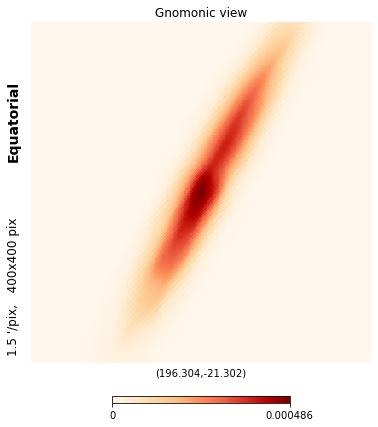

In [5]:
plot_mollview(bns_data['PROB'], 
              nest=True, 
              cmap='OrRd', 
              title='GW170817 Skymap')
plt.savefig('../plots/BNS_Skymap.pdf', 
            overwrite=True)

hp.gnomview(bns_data['PROB'], 
            nest=True, 
            cmap='OrRd',
            rot=(radec[0][0], radec[1][0], 0),
            coord='C',
            xsize=400)

## Fermi GRB 170817A Data:

Data for GRB 170817A can be found in Fermi GBM Trigger bn170817529. The link can be found in [Resources](#Resources:).

In [6]:
GRB170817 = '../data/glg_loclist_all_bn170817529_v02.txt'
grb_data = ascii.read(GRB170817, format='csv', delimiter=' ')

grb_data

RA,DEC
float64,float64
1.0,--
176.8,-39.8
88.0,--
193.814,-34.541
193.405,-33.58
193.002,-32.822
192.737,-32.452
191.606,-30.977
190.938,-30.249


### Plotting GRB 170817A & GW170817:

0.0 180.0 -180.0 180.0
The interval between parallels is 15 deg -0.00'.
The interval between meridians is 15 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 15 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


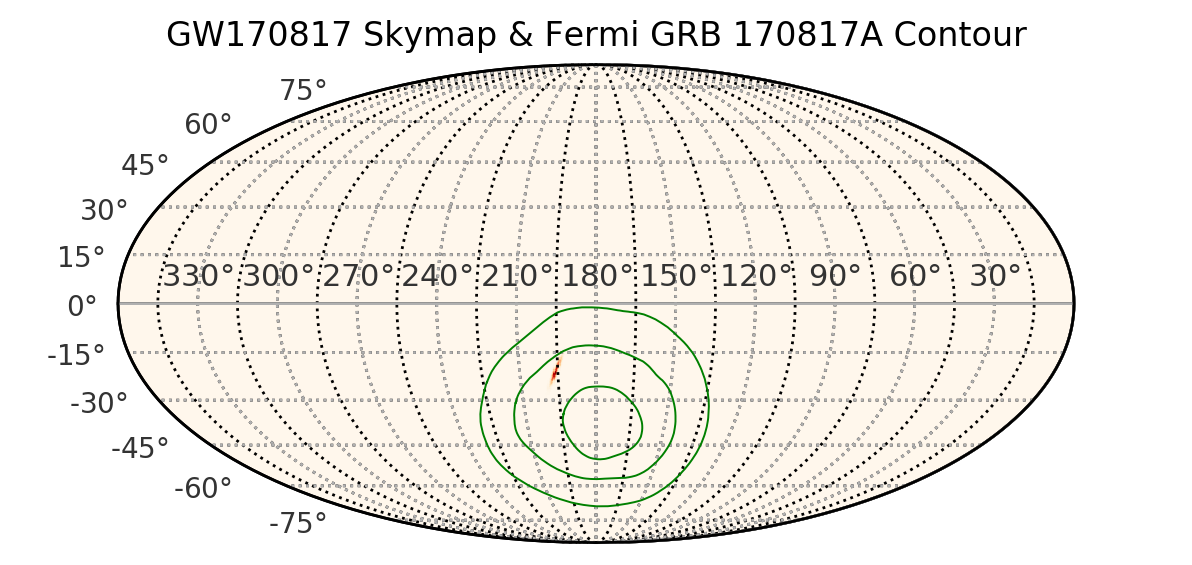

In [7]:
plot_mollview(bns_data['PROB'], 
              nest=True, 
              cmap='OrRd', 
              title='GW170817 Skymap & Fermi GRB 170817A Contour', 
              cbar=False, 
              unit=None)
hp.projplot(grb_data['RA'], 
            grb_data['DEC'], 
            lonlat=True, 
            coord='C', 
            c='g',
            linewidth=0.7)

plt.savefig('../plots/bns_grb_skymap.pdf', 
            overwrite=True)

## Is there a coincident neutrino in IceCube data?

Data used here was taken from All-sky point-source IceCube data: years 2008-2018. The link to IceCube Data Releases  can be found in [Resources](#Resources:).

In [8]:
IceCube = '../data/icecube_10year_ps/events/IC86_VII_exp.csv'
neutrino_data = ascii.read(IceCube, data_start=1, delimiter=' ', format='csv')

neutrino_data[:5]

MJD[days],log10(E/GeV),AngErr[deg],RA[deg],Dec[deg],Azimuth[deg],Zenith[deg]
float64,float64,float64,float64,float64,float64,float64
57891.17694387,2.9,0.89,343.245,13.768,46.287,103.86
57891.18095108,3.13,0.35,127.003,35.576,263.912,125.521
57891.18877491,4.7,0.2,216.473,-23.266,177.292,66.652
57891.19559995,3.02,3.26,176.624,31.43,219.626,121.334
57891.19574583,3.26,0.38,42.288,4.95,354.022,95.023


In [9]:
# looking for neutrinos within +-500 seconds of the event time:
bns_mjd = 57982.52852348908 # from GW fits header
closest_neutrinos = neutrino_data[(neutrino_data['MJD[days]'] <= bns_mjd + 0.005) & (neutrino_data['MJD[days]'] >= bns_mjd - 0.005)]
closest_neutrinos

MJD[days],log10(E/GeV),AngErr[deg],RA[deg],Dec[deg],Azimuth[deg],Zenith[deg]
float64,float64,float64,float64,float64,float64,float64
57982.52543795,3.02,0.63,239.406,19.749,5.64,109.71
57982.52660562,2.6,2.48,321.604,69.76,283.965,159.841
57982.5321185,2.69,1.15,1.334,23.459,246.083,113.557
57982.53304843,3.0,0.48,202.835,5.908,44.935,95.823


## Final Localization Skymap:

0.0 180.0 -180.0 180.0
The interval between parallels is 15 deg -0.00'.
The interval between meridians is 15 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 15 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


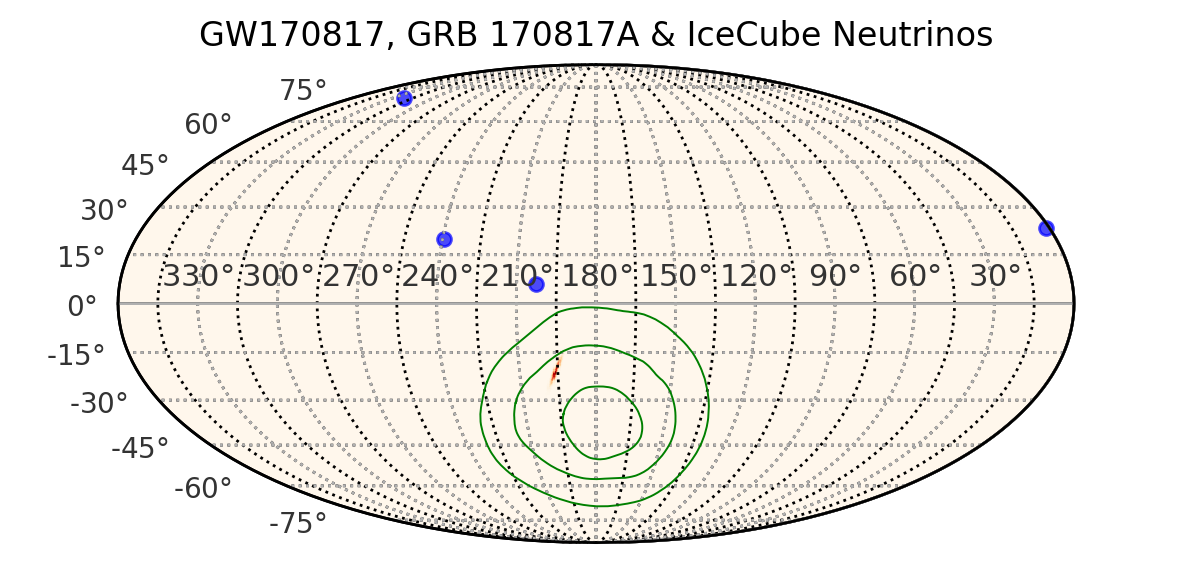

In [10]:
plot_mollview(bns_data['PROB'], 
              nest=True, 
              cmap='OrRd', 
              title='GW170817, GRB 170817A & IceCube Neutrinos')
hp.projscatter(closest_neutrinos['RA[deg]'], 
               closest_neutrinos['Dec[deg]'], 
               marker='.', 
               s=100, 
               c='b', 
               lonlat=True, 
               alpha=0.7)
hp.projplot(grb_data['RA'], 
            grb_data['DEC'], 
            lonlat=True, 
            coord='C', 
            c='g',
            linewidth=0.7)
plt.savefig('../plots/bns_grb_neutrino_Skymap.pdf', overwrite=True)

## Resources:

### Data:
1. [GW170817 Data Release](https://dcc.ligo.org/LIGO-G1701985/public)
2. [Fermi GBM Trigger](https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/2017/bn170817529/current/)
3. [IceCube Data Releases](https://icecube.wisc.edu/science/data-releases/)


### General Resources:
1. [Astropy](https://www.astropy.org)
2. [HEALPy Documentation](https://healpy.readthedocs.io/en/latest/)
2. [GWOSC](https://www.gw-openscience.org/about/)
3. [Anaconda Documentation](https://docs.anaconda.com/anaconda/)
4. [Conda Documentation](https://docs.conda.io/projects/conda/en/latest/index.html)
5. [Conda Forge](https://conda-forge.org/docs/user/introduction.html)
6. [Finding Highest Probability for Multiorder Skymaps](https://emfollow.docs.ligo.org/userguide/tutorial/multiorder_skymaps.html)
8. [Multi-Order Skymaps](https://emfollow.docs.ligo.org/userguide/tutorial/multiorder_skymaps.html)
7. [LIGO moc Documentation](https://lscsoft.docs.ligo.org/ligo.skymap/moc/index.html)
8. [RA and DEC to Degree Converter](https://www.swift.psu.edu/secure/toop/convert.htm)
9. [SCiMMA Project](https://scimma.org/index.html)